# **Live Code 3**
### **HACTIV8 Full Time Data Science Phase 1**

# **1. Perkenalan** 

## **1.1 Identitas**

> Nama  : Ropiudin

> Batch : FTDS OO2-HCK

> Live Code : Live Code 3 

# **2. Judul/Penanda Soal** 

> Pada Live Code ini akan membuat model machine learning Unsupervised Learning dengan menggunakan KMeans untuk melakukan segmentasi terhadap negara-negara berdasarkan harapan hidupnya

# **3. Import Pustaka** 

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder, OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings(action='ignore')

> Cell di atas merupakan daftar *library* yang digunakan dalam Live Code ini

# **3. Data Loading** 

In [9]:
df = pd.read_csv('life-expectancy.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option("display.precision", 0)

In [10]:
df

,Rank,Country,Overall Life,Male Life,Female Life,Continent
0,1,Monaco,89.500,85.600,93.500,Europe
1,2,Japan,85.000,81.700,88.500,Asia
2,3,Singapore,85.000,82.300,87.800,Asia
3,4,Macau; China,84.500,81.600,87.600,Asia
4,5,San Marino,83.300,80.700,86.100,Europe
...,...,...,...,...,...,...
218,219,Gabon,52.100,51.600,52.500,Africa
219,220,Swaziland,51.600,52.200,51.000,Africa
220,221,Afghanistan,51.300,49.900,52.700,Asia
221,222,Guinea-Bissau,50.600,48.600,52.700,Africa


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          223 non-null    int64  
 1   Country       223 non-null    object 
 2   Overall Life  223 non-null    float64
 3   Male Life     223 non-null    float64
 4   Female Life   223 non-null    float64
 5   Continent     223 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 10.6+ KB


> Dataset yang digunakan pada live code ini, berjumlah 223 entri data atau baris dan 6 kolom

In [12]:
df.isnull().sum()

Rank            0
Country         0
Overall Life    0
Male Life       0
Female Life     0
Continent       0
dtype: int64

In [13]:
df[df.duplicated()].shape

(0, 6)

> Pada dataset tidak terdapat missing value disetiap kolom dan tidak terdapat data duplikat

In [14]:
df.describe()

,Rank,Overall Life,Male Life,Female Life
count,223.000,223.000,223.000,223.000
mean,112.000,72.488,70.042,75.019
std,64.519,8.459,8.075,8.987
min,1.000,50.200,48.600,51.000
25%,56.500,67.450,64.500,69.750
50%,112.000,74.900,72.200,77.900
75%,167.500,78.600,75.850,81.600
max,223.000,89.500,85.600,93.500


> Dan dilihat dari describe tidat terdapat anomali pada data

In [15]:
df_num =df.drop(columns=['Country','Continent'])
df_cat =df[['Country','Continent']]

> Pada dataset terdapat data kolom numerik dan kolom kategorik, pada lice code ini kolom knumerik dan kategorik akan dipisah terlebih dahulu untuk diproses ke tahap selanjutnya

In [16]:
df_num.describe()

,Rank,Overall Life,Male Life,Female Life
count,223.000,223.000,223.000,223.000
mean,112.000,72.488,70.042,75.019
std,64.519,8.459,8.075,8.987
min,1.000,50.200,48.600,51.000
25%,56.500,67.450,64.500,69.750
50%,112.000,74.900,72.200,77.900
75%,167.500,78.600,75.850,81.600
max,223.000,89.500,85.600,93.500


> Kolom rank, overall life, male life dan female life merupakan kolom numerik

In [17]:
for i in df_cat:
    print(i)
    print()
    print(df[i].value_counts())
    print('-' * 20)

Country

Monaco                1
Nepal                 1
Greenland; Denmark    1
The Bahamas           1
Guatemala             1
                     ..
Algeria               1
Aruba                 1
Ecuador               1
Sri Lanka             1
Chad                  1
Name: Country, Length: 223, dtype: int64
--------------------
Continent

Africa           55
Europe           51
Asia             49
North America    34
Oceania          20
South America    14
Name: Continent, dtype: int64
--------------------


> Sedangkan kolom country dan kolom continent merupakan kolom katetorik

Berikut deskripsi disetiap kolom pada dataset

> `Rank` :	Ranking harapan hidup suatu negara

> `Country` :	Nama negara

> `Overall Life` :	Angka harapan hidup rata-rata (semakin tinggi semakin baik)

> `Male Life` :	Angka harapan hidup pria (semakin tinggi semakin baik)

> `Female Life` :	Angka harapan hidup wanita (semakin tinggi semakin baik)

> `Continent` :	Benua dimana negara tersebut berada

# **4. Data Cleaning** 

In [18]:
df_clean = df.copy()
df_clean.head()

,Rank,Country,Overall Life,Male Life,Female Life,Continent
0,1,Monaco,89.500,85.600,93.500,Europe
1,2,Japan,85.000,81.700,88.500,Asia
2,3,Singapore,85.000,82.300,87.800,Asia
3,4,Macau; China,84.500,81.600,87.600,Asia
4,5,San Marino,83.300,80.700,86.100,Europe


In [19]:
df_clean = df_clean.drop(columns='Rank')
df_clean.head()

,Country,Overall Life,Male Life,Female Life,Continent
0,Monaco,89.500,85.600,93.500,Europe
1,Japan,85.000,81.700,88.500,Asia
2,Singapore,85.000,82.300,87.800,Asia
3,Macau; China,84.500,81.600,87.600,Asia
4,San Marino,83.300,80.700,86.100,Europe


> Pada tahpan data cleaning, kolom rank didrop. Dikarnakan pada kolom rank hanya pelabelan dari dari setiap negara, oleh karna itu pada kolom rank didrop

# **5. Exploratory Data Analysis (EDA)** 

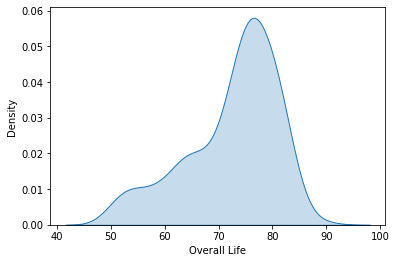

In [20]:
sns.kdeplot(data=df_num, x='Overall Life', fill=True)

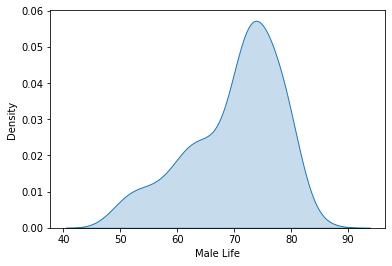

In [21]:
sns.kdeplot(data=df_num, x='Male Life', fill=True)

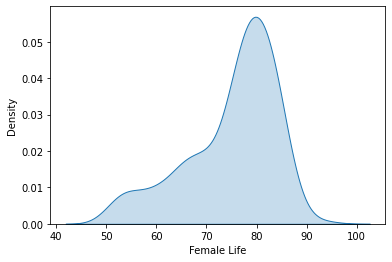

In [22]:
sns.kdeplot(data=df_num, x='Female Life', fill=True)

> Berdasarkan grafik Pada kolom numerik baik pada kolom Overall Life, Male Life dan Female Life,  masing - masing memiliki satu puncak dan memiliki skew ke kiri, berdasarkan dari grafik diatas bisa diketahui bahwa setiap kolom numerik masing - masing berkemungkinan memiliki outlier

In [23]:
df_cat['Continent'].value_counts().reset_index()

,index,Continent
0,Africa,55
1,Europe,51
2,Asia,49
3,North America,34
4,Oceania,20
5,South America,14


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

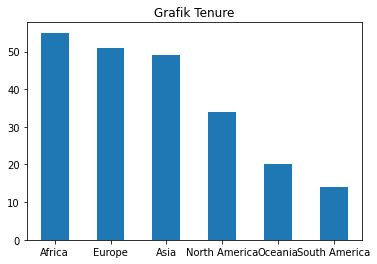

In [24]:
df_cat['Continent'].value_counts().plot(kind='bar')
plt.title('Grafik Tenure')
plt.xticks(rotation = 0)

> Berdasarkan dari tabel maupun grafik, pada kolom continent atau benua terdapat 5 benua, dimana benua afrika merupakan paling terbanyak yaitu sebanyak 55, yang berarti pada dataset di benua afrika memiliki negara yang paling banyak terhadap harapan hidup

In [25]:
df_inf = df_clean.sample(10,random_state=0)
df_inf

,Country,Overall Life,Male Life,Female Life,Continent
96,Saint Kitts and Nevis,75.700,73.300,78.200,North America
202,Cameroon,58.500,57.100,59.900,Africa
169,Burma,66.600,64.200,69.200,Asia
136,Trinidad and Tobago,72.900,69.900,75.900,North America
182,Equatorial Guinea,64.200,63.100,65.400,Africa
150,Kazakhstan,70.800,65.600,75.700,Asia
44,"Saint Helena, Ascension and Tristan da Cunha",79.500,76.600,82.600,Africa
197,Burundi,60.500,58.800,62.300,Africa
64,Falkland Islands,77.900,75.600,79.600,South America
8,Switzerland,82.600,80.300,85.000,Europe


In [26]:
df_clean = df_clean.drop(df_inf.index)
df_clean

,Country,Overall Life,Male Life,Female Life,Continent
0,Monaco,89.500,85.600,93.500,Europe
1,Japan,85.000,81.700,88.500,Asia
2,Singapore,85.000,82.300,87.800,Asia
3,Macau; China,84.500,81.600,87.600,Asia
4,San Marino,83.300,80.700,86.100,Europe
...,...,...,...,...,...
218,Gabon,52.100,51.600,52.500,Africa
219,Swaziland,51.600,52.200,51.000,Africa
220,Afghanistan,51.300,49.900,52.700,Asia
221,Guinea-Bissau,50.600,48.600,52.700,Africa


In [27]:
df_clean.reset_index(drop=True, inplace=True) 
df_inf.reset_index(drop=True, inplace=True)
df_inf

,Country,Overall Life,Male Life,Female Life,Continent
0,Saint Kitts and Nevis,75.700,73.300,78.200,North America
1,Cameroon,58.500,57.100,59.900,Africa
2,Burma,66.600,64.200,69.200,Asia
3,Trinidad and Tobago,72.900,69.900,75.900,North America
4,Equatorial Guinea,64.200,63.100,65.400,Africa
5,Kazakhstan,70.800,65.600,75.700,Asia
6,"Saint Helena, Ascension and Tristan da Cunha",79.500,76.600,82.600,Africa
7,Burundi,60.500,58.800,62.300,Africa
8,Falkland Islands,77.900,75.600,79.600,South America
9,Switzerland,82.600,80.300,85.000,Europe


> Code diatas merupakan code untuk memisahkan data inference dari dataset, data inference digunakan untuk melakukan predict pada model yang sudah didapatkan

In [28]:
df_num =df_clean.drop(columns=['Country','Continent'])
df_cat =df_clean[['Country','Continent']]

# **6. Data Preprocessing** 

### **Numerical Feature**

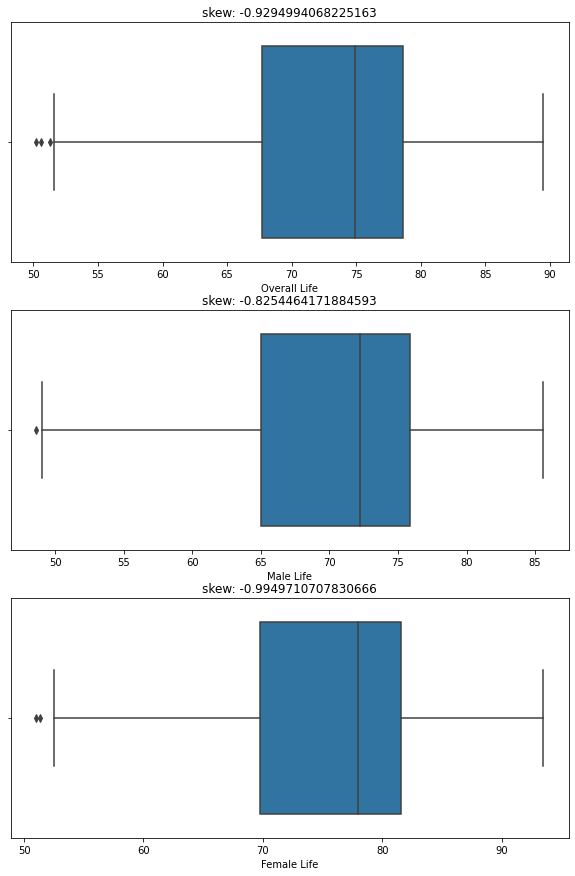

In [29]:
fig, ax = plt.subplots(ncols=1,nrows=3, figsize=[10,15])
ax = ax.flatten()

for idx, col in enumerate(df_num):
    sns.boxplot(df_num[col], ax=ax[idx])
    ax[idx].set_title(f'skew: {df_num[col].skew()}')

plt.show()

> Berdasarkan grafik dari data kolom numerik, masing - masing setiap kolom memiliki outlier, dan masing - masing kolom pada data numerik memilik distribusi yang tidak normal atau skew

In [30]:
def outlier_analysis(df_num,col):
  skewness = df_num[col].skew()
  if skewness>=-0.5 and skewness<=0.5:
    upper = df_num[col].mean() + 3*df_num[col].std()
    lower = df_num[col].mean() - 3*df_num[col].std()
  else:
    Q1 = df_num[col].quantile(0.25)
    Q3 = df_num[col].quantile(0.75)
    IQR = Q3 - Q1

    upper = Q3 + (1.5 * IQR)
    lower = Q1 - (1.5 * IQR)
    
  no_outliers = df_num[(df_num[col]>=lower) &  (df_num[col]<=upper)]
  outliers = df_num[(df_num[col]<lower) | (df_num[col]>upper)]

  return outliers,no_outliers, upper, lower

cols_name = ['Overall Life','Male Life','Female Life']

for i in cols_name:
    out,no_out, up, low = outlier_analysis (df_num,i)
    print(i)
    print('count of outlier: ', len(out))
    print('percentage of outlier: ', (len(out)/len(df_num))*100, '%') 
    print('-'*10)

Overall Life
count of outlier:  3
percentage of outlier:  1.4084507042253522 %
----------
Male Life
count of outlier:  1
percentage of outlier:  0.4694835680751174 %
----------
Female Life
count of outlier:  2
percentage of outlier:  0.9389671361502347 %
----------


> Berdasarkan hasil diatas diketahui banyaknya outlier disetiap kolom numerik, dikarnakan jumalah outlier yang tidak terlalu banyak, maka dilakukan capping terhadap kolom yang terdapat outlier

In [31]:
df_num['Overall Life'] = df_num['Overall Life'].apply(lambda x: up if x>up else low if x<low else x)
df_num['Male Life'] = df_num['Male Life'].apply(lambda x: up if x>up else low if x<low else x)
df_num['Female Life'] = df_num['Female Life'].apply(lambda x: up if x>up else low if x<low else x)

In [32]:
def outlier_analysis(df_num,col):
  skewness = df_num[col].skew()
  if skewness>=-0.5 and skewness<=0.5:
    upper = df_num[col].mean() + 3*df_num[col].std()
    lower = df_num[col].mean() - 3*df_num[col].std()
  else:
    Q1 = df_num[col].quantile(0.25)
    Q3 = df_num[col].quantile(0.75)
    IQR = Q3 - Q1

    upper = Q3 + (1.5 * IQR)
    lower = Q1 - (1.5 * IQR)
    
  no_outliers = df_num[(df_num[col]>=lower) &  (df_num[col]<=upper)]
  outliers = df_num[(df_num[col]<lower) | (df_num[col]>upper)]

  return outliers,no_outliers, upper, lower

cols_name = ['Overall Life','Male Life','Female Life']

for i in cols_name:
    out,no_out, up, low = outlier_analysis (df_num,i)
    print(i)
    print('count of outlier: ', len(out))
    print('percentage of outlier: ', (len(out)/len(df_num))*100, '%') 
    print('-'*10)

Overall Life
count of outlier:  0
percentage of outlier:  0.0 %
----------
Male Life
count of outlier:  0
percentage of outlier:  0.0 %
----------
Female Life
count of outlier:  0
percentage of outlier:  0.0 %
----------


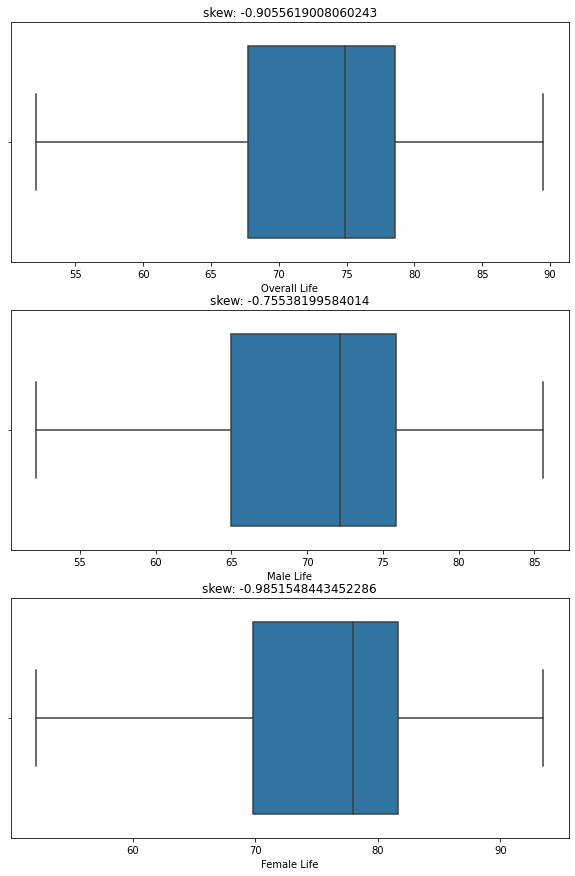

In [33]:
fig, ax = plt.subplots(ncols=1,nrows=3, figsize=[10,15])
ax = ax.flatten()

for idx, col in enumerate(df_num):
    sns.boxplot(df_num[col], ax=ax[idx])
    ax[idx].set_title(f'skew: {df_num[col].skew()}')

plt.show()

> Setelah dilakukan capping dan dicek kembali, pada kolom numerik sudah tidak terdapat outlier, sehingga bisa dilanjutkan ke tahapan selanjutnya

In [34]:
vif_data = pd.DataFrame()
vif_data["feature"] = df_num.columns
  
vif_data["VIF"] = [variance_inflation_factor(df_num.values, i) for i in range(len(df_num.columns))]

vif_data

,feature,VIF
0,Overall Life,55532.540
1,Male Life,15495.486
2,Female Life,15246.407


> Berdasarkan uji multikolinearitas pada kolom numerik, masing - masing kolom saling berhubungan yang mana ini berartikan kolom satu dengan yang lainnya memliki keterkaitan, jadi dari sini bisa saja kita hanya mengambil satu kolom, karna satu kolom sudah mewakili semua kolom pada kolom numerik

In [35]:
df_num.shape

(213, 3)

In [36]:
num_scaler = MinMaxScaler()
df_num_scaled = num_scaler.fit_transform(df_num)

In [37]:
pca = PCA(n_components=3).fit(df_num_scaled)
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

array([0.99176902, 0.99970309, 1.        ])

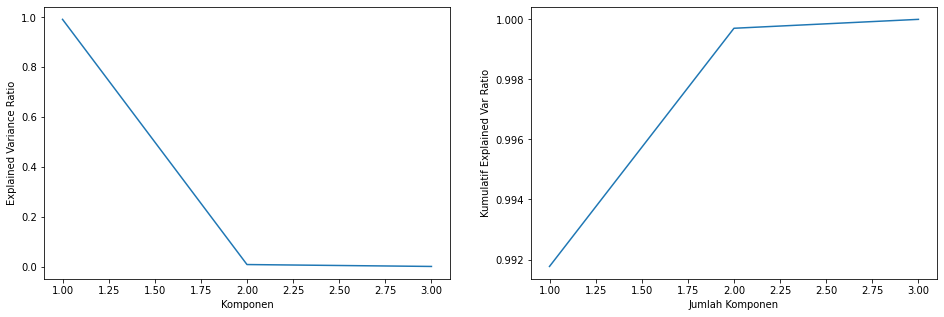

In [38]:
fig,ax=plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,4),pca.explained_variance_ratio_)
ax[0].set_xlabel('Komponen')
ax[0].set_ylabel('Explained Variance Ratio')

ax[1].plot(range(1,4),np.cumsum(pca.explained_variance_ratio_))
ax[1].set_xlabel('Jumlah Komponen')
ax[1].set_ylabel('Kumulatif Explained Var Ratio')
plt.show()

> Berdasarkan PCA terdapat patahan atau elbow di pc 2, dan dilihat dari nilai kumulatif EVR nya memiliki nilai yang sangat besar yaitu hampir 100%

In [39]:
pca = PCA(n_components=0.95)
df_num_reduced = pca.fit_transform(df_num_scaled)

> Pada proses reduksi dimensi, saya menetapkan untuk mengambil komponen sebesar 95% saja, karna menurut saya 95% sudah mewakili keseluruhan kolom pada data numerik

In [40]:
pca.n_components_

1

> Dengan ditentukan komponen sebesar 95%, diperoleh 1 pc, yang nantinya bakalan digunakan pada tahap pemodelan

In [41]:
np.sum(pca.explained_variance_ratio_)

0.9917690188378842

In [42]:
df_num_reduced

array([[-0.7833201 ],
       [-0.57716014],
       [-0.5786327 ],
       [-0.55566388],
       [-0.50098707],
       [-0.48930492],
       [-0.48362662],
       [-0.4781581 ],
       [-0.46493347],
       [-0.46266783],
       [-0.45792247],
       [-0.45338903],
       [-0.45051599],
       [-0.44958091],
       [-0.44684772],
       [-0.43242809],
       [-0.43469588],
       [-0.44142934],
       [-0.42855004],
       [-0.43236031],
       [-0.42434429],
       [-0.4168679 ],
       [-0.4108619 ],
       [-0.40205064],
       [-0.40985904],
       [-0.40104778],
       [-0.40572322],
       [-0.40252034],
       [-0.39216875],
       [-0.38562529],
       [-0.38422481],
       [-0.37955152],
       [-0.38001907],
       [-0.37013502],
       [-0.37153765],
       [-0.36412903],
       [-0.36373141],
       [-0.35518007],
       [-0.35043686],
       [-0.34489841],
       [-0.33695447],
       [-0.33615923],
       [-0.32954584],
       [-0.31966395],
       [-0.31912648],
       [-0

In [43]:
df_num_reduced = pd.DataFrame(df_num_reduced)
df_num_reduced

,0
0,-0.783
1,-0.577
2,-0.579
3,-0.556
4,-0.501
...,...
208,0.942
209,0.946
210,0.940
211,0.940


### **Categorical Feature**

In [44]:
df_cat

,Country,Continent
0,Monaco,Europe
1,Japan,Asia
2,Singapore,Asia
3,Macau; China,Asia
4,San Marino,Europe
...,...,...
208,Gabon,Africa
209,Swaziland,Africa
210,Afghanistan,Asia
211,Guinea-Bissau,Africa


> Pada kolom numerik akan dilakukan encoding, yang mana pada kolom `country` akan dilakukan One Hot Encoding dan pada kolom `Continent` akan dilakukan Ordinal Encoder

#### **One Hot Encoding**

In [45]:
ohe_enc = OneHotEncoder(sparse=False, handle_unknown='ignore')

cat_ohe = pd.DataFrame(ohe_enc.fit_transform(df_cat[['Country']]))
cat_ohe.columns = ohe_enc.get_feature_names(['Country'])

review = pd.concat([df_cat[['Country']].reset_index(drop=True), cat_ohe], axis=1)
review

,Country,Country_Afghanistan,Country_Albania,Country_Algeria,Country_American Samoa,Country_Andorra,Country_Angola,Country_Anguilla,Country_Antigua and Barbuda,Country_Argentina,Country_Armenia,Country_Aruba,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahrain,Country_Bangladesh,Country_Barbados,Country_Belarus,Country_Belgium,Country_Belize,Country_Benin,Country_Bermuda,Country_Bhutan,Country_Bolivia,Country_Bosnia and Herzegovina,Country_Botswana,Country_Brazil,Country_British Virgin Islands,Country_Brunei,Country_Bulgaria,Country_Burkina Faso,Country_Cabo Verde,Country_Cambodia,Country_Canada,Country_Cayman Islands,Country_Central African Republic,Country_Chad,Country_Chile,Country_Colombia,Country_Comoros,Country_Cook Islands,Country_Costa Rica,Country_Croatia,Country_Cuba,Country_Cyprus,Country_Czech Republic,Country_Côte d'Ivoire,Country_Democratic Republic of the Congo,Country_Denmark,Country_Djibouti,Country_Dominica,Country_Dominican Republic,Country_Ecuador,Country_Egypt,Country_El Salvador,Country_Eritrea,Country_Estonia,Country_Ethiopia,Country_European Union,Country_Faroe Islands,Country_Federated States of Micronesia,Country_Fiji,Country_Finland,"Country_France, metropolitan",Country_French Polynesia,Country_Gabon,Country_Gaza Strip,Country_Georgia,Country_Germany,Country_Ghana,Country_Gibraltar,Country_Greece,Country_Greenland; Denmark,Country_Grenada,Country_Guatemala,Country_Guernsey,Country_Guinea,Country_Guinea-Bissau,Country_Guyana,Country_Haiti,Country_Honduras,"Country_Hong Kong, China",Country_Hungary,Country_Iceland,Country_India,Country_Indonesia,Country_Iran,Country_Iraq,Country_Ireland,Country_Isle of Man,Country_Israel,Country_Italy,Country_Jamaica,Country_Japan,Country_Jersey,Country_Jordan,Country_Kenya,Country_Kiribati,Country_Kuwait,Country_Kyrgyzstan,Country_Laos,Country_Latvia,Country_Lebanon,Country_Lesotho,Country_Liberia,Country_Libya,Country_Liechtenstein,Country_Lithuania,Country_Luxembourg,Country_Macau; China,Country_Madagascar,Country_Malawi,Country_Malaysia,Country_Maldives,Country_Mali,Country_Malta,Country_Marshall Islands,Country_Mauritania,Country_Mauritius,Country_Mexico,Country_Moldova,Country_Monaco,Country_Mongolia,Country_Montserrat,Country_Morocco,Country_Mozambique,Country_Namibia,Country_Nauru,Country_Nepal,Country_Netherlands,Country_New Caledonia,Country_New Zealand,Country_Nicaragua,Country_Niger,Country_Nigeria,Country_North Korea,Country_Northern Mariana Islands; US,Country_Norway,Country_Oman,Country_Pakistan,Country_Palau,Country_Panama,Country_Papua New Guinea,Country_Paraguay,Country_People's Republic of China,Country_Peru,Country_Philippines,Country_Poland,Country_Portugal,Country_Puerto Rico,Country_Qatar,Country_Republic of Macedonia,Country_Republic of the Congo,Country_Romania,Country_Russia,Country_Rwanda,Country_Saint Lucia,Country_Saint Pierre and Miquelon,Country_Saint Vincent and the Grenadines,Country_Samoa,Country_San Marino,Country_Saudi Arabia,Country_Senegal,Country_Serbia,Country_Seychelles,Country_Sierra Leone,Country_Singapore,Country_Sint Maarten,Country_Slovakia,Country_Slovenia,Country_Solomon Islands,Country_Somalia,Country_South Africa,Country_South Korea,Country_Spain,Country_Sri Lanka,Country_Sudan,Country_Suriname,Country_Swaziland,Country_Sweden,Country_Syria,Country_São Tomé and Príncipe,Country_Taiwan,Country_Tajikistan,Country_Tanzania,Country_Thailand,Country_The Bahamas,Country_The Gambia,Country_Timor-Leste,Country_Togo,Country_Tonga,Country_Tunisia,Country_Turkey,Country_Turkmenistan,Country_Turks and Caicos Islands,Country_Tuvalu,Country_U.S. Virgin Islands,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela,Country_Vietnam,Country_Wallis and Futuna,Country_West Bank,Country_Western Sahara,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,Monaco,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0

#### **Ordinal Encoder**

In [46]:
for i in ['Continent']:
    print(df_cat[i].value_counts())
    print('-'*30)

Africa           51
Europe           50
Asia             47
North America    32
Oceania          20
South America    13
Name: Continent, dtype: int64
------------------------------


In [47]:
continent_cat = ['Africa', 'Europe', 'Asia','North America', 'Oceania','South America']

ord_enc = OrdinalEncoder(categories=[continent_cat])
cat_ord = pd.DataFrame(ord_enc.fit_transform(df_cat[['Continent']]))

cat_ord.columns = ['Continent']
review = pd.concat([df_cat[['Continent']].reset_index(drop=True), cat_ord], axis=1)

review

,Continent,Continent
0,Europe,1.000
1,Asia,2.000
2,Asia,2.000
3,Asia,2.000
4,Europe,1.000
...,...,...
208,Africa,0.000
209,Africa,0.000
210,Asia,2.000
211,Africa,0.000


> Setelah dilakukan encoding pada data kolom kategorik, selanjutnya data kolom kategorik dan data kolom numerik digabung, dan siap untuk dilakukan modeling 

In [48]:
df_final = pd.concat([df_num_reduced,cat_ohe,cat_ord],axis=1)
df_final

,0,Country_Afghanistan,Country_Albania,Country_Algeria,Country_American Samoa,Country_Andorra,Country_Angola,Country_Anguilla,Country_Antigua and Barbuda,Country_Argentina,Country_Armenia,Country_Aruba,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahrain,Country_Bangladesh,Country_Barbados,Country_Belarus,Country_Belgium,Country_Belize,Country_Benin,Country_Bermuda,Country_Bhutan,Country_Bolivia,Country_Bosnia and Herzegovina,Country_Botswana,Country_Brazil,Country_British Virgin Islands,Country_Brunei,Country_Bulgaria,Country_Burkina Faso,Country_Cabo Verde,Country_Cambodia,Country_Canada,Country_Cayman Islands,Country_Central African Republic,Country_Chad,Country_Chile,Country_Colombia,Country_Comoros,Country_Cook Islands,Country_Costa Rica,Country_Croatia,Country_Cuba,Country_Cyprus,Country_Czech Republic,Country_Côte d'Ivoire,Country_Democratic Republic of the Congo,Country_Denmark,Country_Djibouti,Country_Dominica,Country_Dominican Republic,Country_Ecuador,Country_Egypt,Country_El Salvador,Country_Eritrea,Country_Estonia,Country_Ethiopia,Country_European Union,Country_Faroe Islands,Country_Federated States of Micronesia,Country_Fiji,Country_Finland,"Country_France, metropolitan",Country_French Polynesia,Country_Gabon,Country_Gaza Strip,Country_Georgia,Country_Germany,Country_Ghana,Country_Gibraltar,Country_Greece,Country_Greenland; Denmark,Country_Grenada,Country_Guatemala,Country_Guernsey,Country_Guinea,Country_Guinea-Bissau,Country_Guyana,Country_Haiti,Country_Honduras,"Country_Hong Kong, China",Country_Hungary,Country_Iceland,Country_India,Country_Indonesia,Country_Iran,Country_Iraq,Country_Ireland,Country_Isle of Man,Country_Israel,Country_Italy,Country_Jamaica,Country_Japan,Country_Jersey,Country_Jordan,Country_Kenya,Country_Kiribati,Country_Kuwait,Country_Kyrgyzstan,Country_Laos,Country_Latvia,Country_Lebanon,Country_Lesotho,Country_Liberia,Country_Libya,Country_Liechtenstein,Country_Lithuania,Country_Luxembourg,Country_Macau; China,Country_Madagascar,Country_Malawi,Country_Malaysia,Country_Maldives,Country_Mali,Country_Malta,Country_Marshall Islands,Country_Mauritania,Country_Mauritius,Country_Mexico,Country_Moldova,Country_Monaco,Country_Mongolia,Country_Montserrat,Country_Morocco,Country_Mozambique,Country_Namibia,Country_Nauru,Country_Nepal,Country_Netherlands,Country_New Caledonia,Country_New Zealand,Country_Nicaragua,Country_Niger,Country_Nigeria,Country_North Korea,Country_Northern Mariana Islands; US,Country_Norway,Country_Oman,Country_Pakistan,Country_Palau,Country_Panama,Country_Papua New Guinea,Country_Paraguay,Country_People's Republic of China,Country_Peru,Country_Philippines,Country_Poland,Country_Portugal,Country_Puerto Rico,Country_Qatar,Country_Republic of Macedonia,Country_Republic of the Congo,Country_Romania,Country_Russia,Country_Rwanda,Country_Saint Lucia,Country_Saint Pierre and Miquelon,Country_Saint Vincent and the Grenadines,Country_Samoa,Country_San Marino,Country_Saudi Arabia,Country_Senegal,Country_Serbia,Country_Seychelles,Country_Sierra Leone,Country_Singapore,Country_Sint Maarten,Country_Slovakia,Country_Slovenia,Country_Solomon Islands,Country_Somalia,Country_South Africa,Country_South Korea,Country_Spain,Country_Sri Lanka,Country_Sudan,Country_Suriname,Country_Swaziland,Country_Sweden,Country_Syria,Country_São Tomé and Príncipe,Country_Taiwan,Country_Tajikistan,Country_Tanzania,Country_Thailand,Country_The Bahamas,Country_The Gambia,Country_Timor-Leste,Country_Togo,Country_Tonga,Country_Tunisia,Country_Turkey,Country_Turkmenistan,Country_Turks and Caicos Islands,Country_Tuvalu,Country_U.S. Virgin Islands,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela,Country_Vietnam,Country_Wallis and Futuna,Country_West Bank,Country_Western Sahara,Country_Yemen,Country_Zambia,Country_Zimbabwe,Continent
0,-0.783,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000

# **7. Modeling** 

## **7.1. Model Definition**

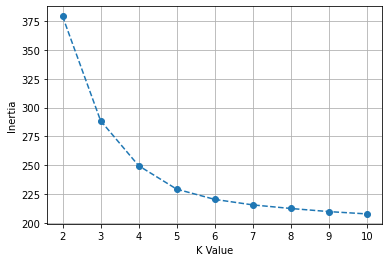

In [49]:
K = [2,3,4,5,6,7,8,9,10]
inertia=[KMeans(n_clusters=i,n_init=15,random_state=0).fit(df_final).inertia_ for i in K]
plt.plot(K,inertia,'o--')
plt.xlabel('K Value')
plt.ylabel('Inertia')
plt.grid()
plt.show()

> Pada modeling, digunakan model KMeans untuk membuat clustering pada dataset

In [50]:
inertia

[379.1182046831298,
 288.57530056689455,
 249.5774104760494,
 229.25630943959868,
 220.37191971568683,
 215.6000096265015,
 212.4911329526713,
 209.79342194781088,
 207.78244291399312]

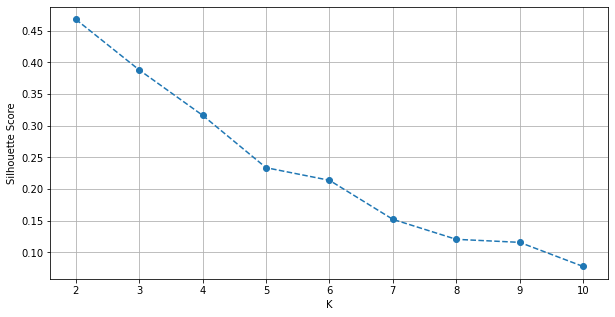

In [74]:
K = [2,3,4,5,6,7,8,9,10]
s_score_slc=[silhouette_score(df_final, KMeans(n_clusters=i,n_init=15,random_state=0).fit(df_final).labels_) for i in K]
plt.figure(figsize=(10,5))
plt.plot(K,s_score_slc,'o--')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

In [52]:
s_score_slc

[0.3877696925877606,
 0.27992420762115705,
 0.22218643890314368,
 0.1956240961360062,
 0.19174765060130355,
 0.15865732927458204,
 0.1242735896502833,
 0.1146954364355761,
 0.07629094545953234]

> Berdasarkan proses model definisi dengan menggunakan model kmeans, diketahui bahwa pada grafik pertama terdapat patahan atau elbow di k value 3 dan 4, untuk dapat menentukan nilai k mana yang diambil maka perlu dilihat silhouette score pada grafik ke dua

> Berdasarkan silhouette score, nilai k 3 memiliki silhouette score lebih besar dari pada silhouette score di k 4, oleh karna itu pada model kmeans ditentukan menggunakan k 3 atau n cluster 3

## **7.2. Model Evaluation**

In [53]:
KM = KMeans(n_clusters=3,n_init=15,random_state=0).fit(df_final)
KM.fit_predict(df_final)
df_final['K-Means'] = KM.labels_
df_final

,0,Country_Afghanistan,Country_Albania,Country_Algeria,Country_American Samoa,Country_Andorra,Country_Angola,Country_Anguilla,Country_Antigua and Barbuda,Country_Argentina,Country_Armenia,Country_Aruba,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahrain,Country_Bangladesh,Country_Barbados,Country_Belarus,Country_Belgium,Country_Belize,Country_Benin,Country_Bermuda,Country_Bhutan,Country_Bolivia,Country_Bosnia and Herzegovina,Country_Botswana,Country_Brazil,Country_British Virgin Islands,Country_Brunei,Country_Bulgaria,Country_Burkina Faso,Country_Cabo Verde,Country_Cambodia,Country_Canada,Country_Cayman Islands,Country_Central African Republic,Country_Chad,Country_Chile,Country_Colombia,Country_Comoros,Country_Cook Islands,Country_Costa Rica,Country_Croatia,Country_Cuba,Country_Cyprus,Country_Czech Republic,Country_Côte d'Ivoire,Country_Democratic Republic of the Congo,Country_Denmark,Country_Djibouti,Country_Dominica,Country_Dominican Republic,Country_Ecuador,Country_Egypt,Country_El Salvador,Country_Eritrea,Country_Estonia,Country_Ethiopia,Country_European Union,Country_Faroe Islands,Country_Federated States of Micronesia,Country_Fiji,Country_Finland,"Country_France, metropolitan",Country_French Polynesia,Country_Gabon,Country_Gaza Strip,Country_Georgia,Country_Germany,Country_Ghana,Country_Gibraltar,Country_Greece,Country_Greenland; Denmark,Country_Grenada,Country_Guatemala,Country_Guernsey,Country_Guinea,Country_Guinea-Bissau,Country_Guyana,Country_Haiti,Country_Honduras,"Country_Hong Kong, China",Country_Hungary,Country_Iceland,Country_India,Country_Indonesia,Country_Iran,Country_Iraq,Country_Ireland,Country_Isle of Man,Country_Israel,Country_Italy,Country_Jamaica,Country_Japan,Country_Jersey,Country_Jordan,Country_Kenya,Country_Kiribati,Country_Kuwait,Country_Kyrgyzstan,Country_Laos,Country_Latvia,Country_Lebanon,Country_Lesotho,Country_Liberia,Country_Libya,Country_Liechtenstein,Country_Lithuania,Country_Luxembourg,Country_Macau; China,Country_Madagascar,Country_Malawi,Country_Malaysia,Country_Maldives,Country_Mali,Country_Malta,Country_Marshall Islands,Country_Mauritania,Country_Mauritius,Country_Mexico,Country_Moldova,Country_Monaco,Country_Mongolia,Country_Montserrat,Country_Morocco,Country_Mozambique,Country_Namibia,Country_Nauru,Country_Nepal,Country_Netherlands,Country_New Caledonia,Country_New Zealand,Country_Nicaragua,Country_Niger,Country_Nigeria,Country_North Korea,Country_Northern Mariana Islands; US,Country_Norway,Country_Oman,Country_Pakistan,Country_Palau,Country_Panama,Country_Papua New Guinea,Country_Paraguay,Country_People's Republic of China,Country_Peru,Country_Philippines,Country_Poland,Country_Portugal,Country_Puerto Rico,Country_Qatar,Country_Republic of Macedonia,Country_Republic of the Congo,Country_Romania,Country_Russia,Country_Rwanda,Country_Saint Lucia,Country_Saint Pierre and Miquelon,Country_Saint Vincent and the Grenadines,Country_Samoa,Country_San Marino,Country_Saudi Arabia,Country_Senegal,Country_Serbia,Country_Seychelles,Country_Sierra Leone,Country_Singapore,Country_Sint Maarten,Country_Slovakia,Country_Slovenia,Country_Solomon Islands,Country_Somalia,Country_South Africa,Country_South Korea,Country_Spain,Country_Sri Lanka,Country_Sudan,Country_Suriname,Country_Swaziland,Country_Sweden,Country_Syria,Country_São Tomé and Príncipe,Country_Taiwan,Country_Tajikistan,Country_Tanzania,Country_Thailand,Country_The Bahamas,Country_The Gambia,Country_Timor-Leste,Country_Togo,Country_Tonga,Country_Tunisia,Country_Turkey,Country_Turkmenistan,Country_Turks and Caicos Islands,Country_Tuvalu,Country_U.S. Virgin Islands,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela,Country_Vietnam,Country_Wallis and Futuna,Country_West Bank,Country_Western Sahara,Country_Yemen,Country_Zambia,Country_Zimbabwe,Continent,K-Means
0,-0.783,0.000,0.000,0.000,0.000,0.000,0.000,0.0

> Output diatas merupakan hasil dari clustering pada  dataset dengan menggunakan model kmeans, dimana pada dataset berdasarkan model kmeans dikelompokkan menjadi 3 cluster

### **EDA KMeans Model 1**

In [54]:
df_clean

,Country,Overall Life,Male Life,Female Life,Continent
0,Monaco,89.500,85.600,93.500,Europe
1,Japan,85.000,81.700,88.500,Asia
2,Singapore,85.000,82.300,87.800,Asia
3,Macau; China,84.500,81.600,87.600,Asia
4,San Marino,83.300,80.700,86.100,Europe
...,...,...,...,...,...
208,Gabon,52.100,51.600,52.500,Africa
209,Swaziland,51.600,52.200,51.000,Africa
210,Afghanistan,51.300,49.900,52.700,Asia
211,Guinea-Bissau,50.600,48.600,52.700,Africa


In [55]:
df_clean['Cluster'] = KM.labels_

In [56]:
df_clean

,Country,Overall Life,Male Life,Female Life,Continent,Cluster
0,Monaco,89.500,85.600,93.500,Europe,0
1,Japan,85.000,81.700,88.500,Asia,0
2,Singapore,85.000,82.300,87.800,Asia,0
3,Macau; China,84.500,81.600,87.600,Asia,0
4,San Marino,83.300,80.700,86.100,Europe,0
...,...,...,...,...,...,...
208,Gabon,52.100,51.600,52.500,Africa,1
209,Swaziland,51.600,52.200,51.000,Africa,1
210,Afghanistan,51.300,49.900,52.700,Asia,0
211,Guinea-Bissau,50.600,48.600,52.700,Africa,1


In [57]:
a = pd.DataFrame(df_clean['Cluster'])
a.value_counts()/len(a) *100

Cluster
0         45.540
2         30.516
1         23.944
dtype: float64

> Berdasarkan hasil clustering menggunakan kmeans, pada cluster 0 memiliki persentase paling banyak dibandingkan cluster yang lainnya, yaitu sebanyak 45.540%

In [58]:
a.value_counts()

Cluster
0          97
2          65
1          51
dtype: int64

> Output diatas merupakan jumlah data dimasing - masing cluster, dimana cluster 0 memiliki jumlah data terbanyak yaitu sebesar 97 data, dan bisa diartikan juga pada cluster 0 terdapat 97 negara

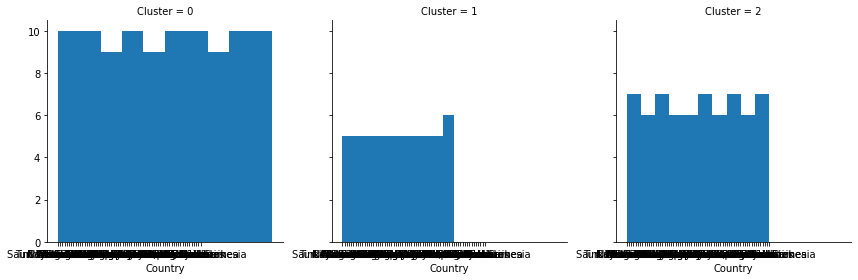

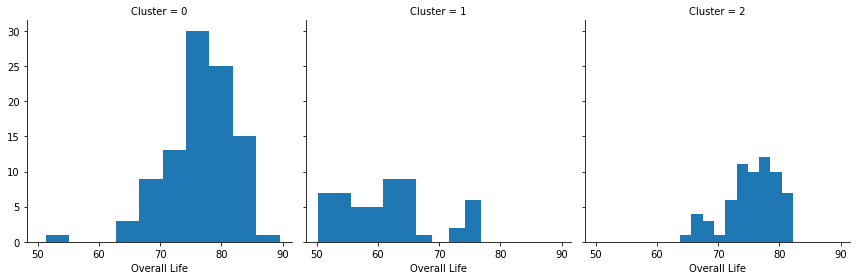

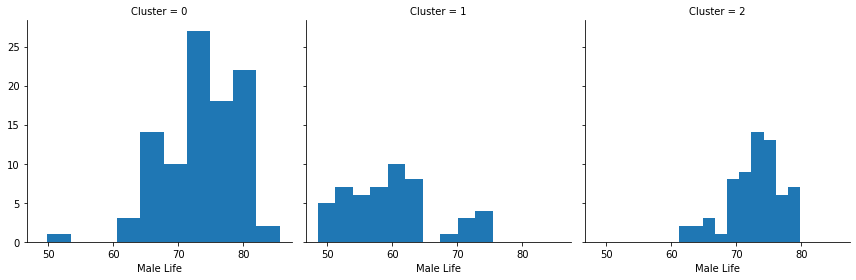

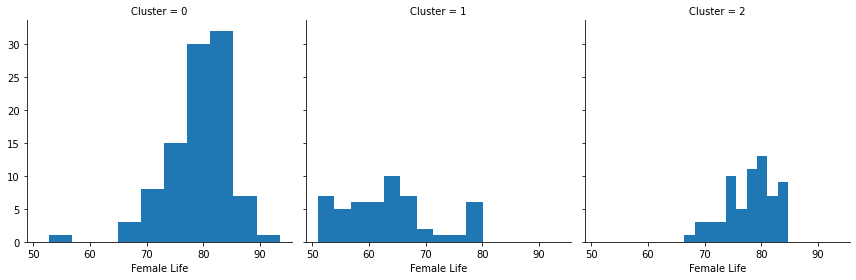

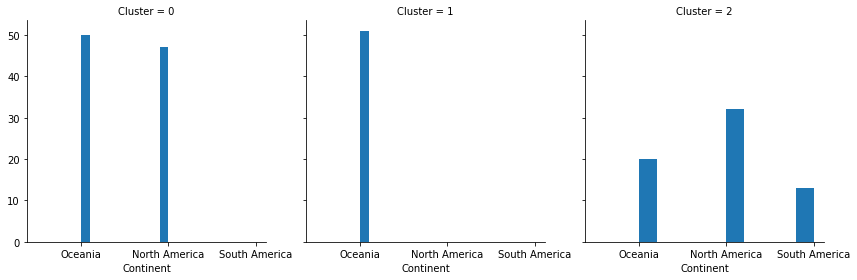

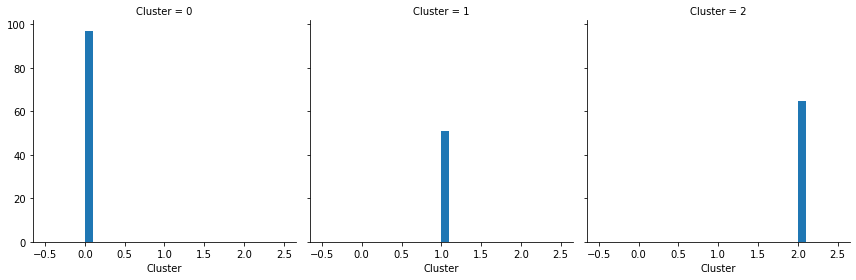

In [59]:
for c in df_clean:
    grid= sns.FacetGrid(df_clean, col='Cluster', height=4)
    grid.map(plt.hist, c)

Berdasarakan grafik diatas dapat diinterpretasikan sebagai berikut:

> Pada kolom country atau negara, pada cluster 0 terdapat 97 negara, cluster 1 terdapat 51 negara dan pada cluster 2 terdapat 65. sehingga dapat disimpulkan cluster 0 merupakan cluster terbanyak 

> pada kolom overall life, pada cluster 0 memiliki rentang overall life atau rata - rata harapan hidup di angka 70 - 80 ini menunjukan nilai yang tinggi. Sementara pada cluster 0 memiliki rentang rata - rata harapan hidup di angka 50 - 60. Sedangkang pada cluster 2 memiliki rentang rata - rata harapan hidup di angka 70 - 80

> pada kolom male life dan female life, memiliki rentang rata - rata hidup disetiap cluster sama seperti kolom overall life

In [60]:
data_0 = df_clean[df_clean['Cluster']==0]
data_1 = df_clean[df_clean['Cluster']==1]
data_2 = df_clean[df_clean['Cluster']==2]

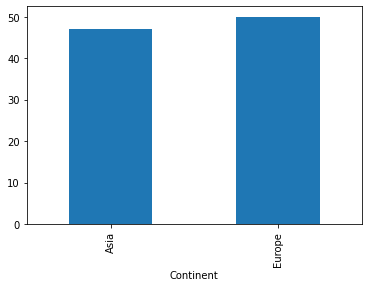

In [61]:
data_0.groupby('Continent').count()['Cluster'].plot(kind='bar')

> Pada kolom continent di cluster 0, hanya terdapat 2 benua yaitu asia dan eropa

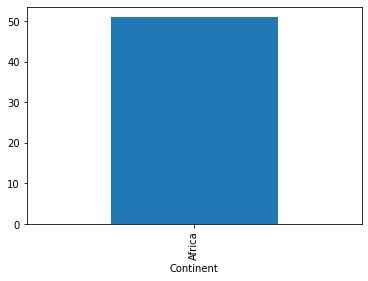

In [62]:
data_1.groupby('Continent').count()['Cluster'].plot(kind='bar')

> Pada kolom continent di cluster 1, hanya terdapat 1 benua, yaitu afrika

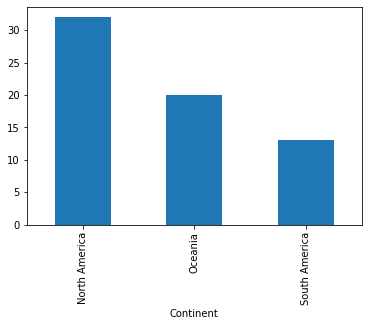

In [63]:
data_2.groupby('Continent').count()['Cluster'].plot(kind='bar')

> Pada kolom continent di cluster 2, hanya terdapat 3 benua yaitu North America, oceania dan south america

# **8. Model Inference**

In [64]:
df_inf

,Country,Overall Life,Male Life,Female Life,Continent
0,Saint Kitts and Nevis,75.700,73.300,78.200,North America
1,Cameroon,58.500,57.100,59.900,Africa
2,Burma,66.600,64.200,69.200,Asia
3,Trinidad and Tobago,72.900,69.900,75.900,North America
4,Equatorial Guinea,64.200,63.100,65.400,Africa
5,Kazakhstan,70.800,65.600,75.700,Asia
6,"Saint Helena, Ascension and Tristan da Cunha",79.500,76.600,82.600,Africa
7,Burundi,60.500,58.800,62.300,Africa
8,Falkland Islands,77.900,75.600,79.600,South America
9,Switzerland,82.600,80.300,85.000,Europe


In [65]:
df_num_inf =df_inf.drop(columns=['Country','Continent'])
df_cat_inf =df_inf[['Country','Continent']]

In [66]:
df_num_inf_scaled = num_scaler.transform(df_num_inf)

In [67]:
pca = PCA(n_components=1)
df_num_inf_reduced = pca.fit_transform(df_num_inf_scaled)

In [68]:
df_num_inf_reduced = pd.DataFrame(df_num_inf_reduced)
df_num_inf_reduced

,0
0,-0.225
1,0.575
2,0.199
3,-0.090
4,0.306
5,0.023
6,-0.402
7,0.482
8,-0.319
9,-0.548


In [69]:
ohe_enc = OneHotEncoder(sparse=False, handle_unknown='ignore')

cat_ohe = pd.DataFrame(ohe_enc.fit_transform(df_cat_inf[['Country']]))
cat_ohe.columns = ohe_enc.get_feature_names(['Country'])

review = pd.concat([df_cat_inf[['Country']].reset_index(drop=True), cat_ohe], axis=1)
review

,Country,Country_Burma,Country_Burundi,Country_Cameroon,Country_Equatorial Guinea,Country_Falkland Islands,Country_Kazakhstan,"Country_Saint Helena, Ascension and Tristan da Cunha",Country_Saint Kitts and Nevis,Country_Switzerland,Country_Trinidad and Tobago
0,Saint Kitts and Nevis,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000
1,Cameroon,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,Burma,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,Trinidad and Tobago,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
4,Equatorial Guinea,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000
5,Kazakhstan,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000
6,"Saint Helena, Ascension and Tristan da Cunha",0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000
7,Burundi,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
8,Falkland Islands,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000
9,Switzerland,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000


In [70]:
continent_cat = ['Africa', 'Europe', 'Asia','North America', 'Oceania','South America']

ord_enc = OrdinalEncoder(categories=[continent_cat])
cat_ord = pd.DataFrame(ord_enc.fit_transform(df_cat_inf[['Continent']]))

cat_ord.columns = ['Continent']
review = pd.concat([df_cat_inf[['Continent']].reset_index(drop=True), cat_ord], axis=1)

review

,Continent,Continent
0,North America,3.000
1,Africa,0.000
2,Asia,2.000
3,North America,3.000
4,Africa,0.000
5,Asia,2.000
6,Africa,0.000
7,Africa,0.000
8,South America,5.000
9,Europe,1.000


In [71]:
df_inf_final = pd.concat([df_num_inf_reduced,cat_ohe,cat_ord],axis=1)
df_inf_final

,0,Country_Burma,Country_Burundi,Country_Cameroon,Country_Equatorial Guinea,Country_Falkland Islands,Country_Kazakhstan,"Country_Saint Helena, Ascension and Tristan da Cunha",Country_Saint Kitts and Nevis,Country_Switzerland,Country_Trinidad and Tobago,Continent
0,-0.225,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,3.000
1,0.575,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,0.199,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000
3,-0.090,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,3.000
4,0.306,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
5,0.023,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,2.000
6,-0.402,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000
7,0.482,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
8,-0.319,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,5.000
9,-0.548,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000


In [72]:
KM.fit_predict(df_inf_final)

array([0, 2, 0, 0, 2, 0, 2, 2, 1, 2], dtype=int32)

> Pada tahapan model inference, model yang saya gunakan pada tahapan ini adalah model kmeans, dan ketika dimasukan data baru model dapat berjalan dan melakukan prediksi yang berarti model dapat digunakan dan dapat berjalan dalam melakukan prediksi terhadap data baru

# **9. Questions & Conclusions** 

## **9.1. Questions** 

**1. Pada bagian eksplorasi data, apa insight menarik yang bisa kamu ceritakan ?**

> Hal yang menarik pada eksplorasi data adalah, terdapat informasi bahwa dibenua afrika memiliki negara paling banyak berdasarkan harapan  hidup dibandingkan benua - benua yang lainnya, hal ini berarti dibenua afrika memiliki banyak negara - negara yang masuk kedalam negara berdasarkan harapan hidup

**2. Berapa cluster yang berhasil kamu peroleh dari dataset tersebut ? Apakah sudah optimal ? Visualisasikan hasil clustering yang kamu peroleh dengan plot 2 dimensi dimana 2 dimensi tersebut merupakan dimensi yang diperoleh dari hasil reduksi dimensi.**

> Cluster yang saya peroleh adalah sebanyak 3 cluster, dan berdasarkan nilai silhouette score nilai k 3 memiliki silhouette score terbesar dibandinkan nilai k yang memiliki patahan lainnya, sehingga menurut saya cluster sebanyak 3 sudah optimal.

**3. Bagaimana karakteristik dari masing-masing cluster ? Bisakah kamu visualisasikan dan ceritakan ?**

> Berdasarkan hasil analisis diatas, terdapat data dimasing - masing cluster yaitu sebagai berikut:

 - Cluster 0 => 97
 - Cluster 2 => 65
 - Cluster 1 => 51

> Berdasarkan hasil diatas, dapat disimpulkan bahwa, pada cluster 0 memiliki data yang paling banyak yaitu sebanyak 97 data atau negara

> Dan berdasarkan Pada kolom continent di cluster 0, hanya terdapat 2 benua yaitu asia dan eropa. Pada kolom continent di cluster 1, hanya terdapat 1 benua, yaitu afrika dan Pada kolom continent di cluster 2, hanya terdapat 3 benua yaitu North America, oceania dan south america

**4. Apa insight menarik yang kamu peroleh dari jawaban/analisa nomor 3 ?**

> Informasi yang menarik pada nomor 3 adalah pada cluster 1 hanya terdapat 1 benua, yaitu benua afrika saja. Dan cluster 0 yang merupakan cluster yang memiliki data paling banyak hanya terdapat 2 benua, yaitu benua asia dan eropa

> Sehingga dapat disimpulkan bawah pada cluster 0, merupakan cluster benua asia dan eropa, cluster 1 merupakan cluster benua afrika dan cluster 2 merupakan cluster benua  North America, oceania dan south america

**5. Dibandingkan dengan EDA, apakah ada kesamaan dari hasil clustering yang kamu peroleh ? Ceritakan analisamu !**

> Terdapat perbedaan antara EDA san hasil clustering, yang mana di EDA pada benua asia dan eropa terdapat total 100 negara, sedangkan diclustering terdapat 97 negara

> Di benua afrika pada EDA dan hasil clustering memiliki jumlah negara yang sama 

> 

## **9.2. Conclusions** 

Dari overall analysis dapat disimpulkan bahwa:

1. Pada analisis diatas data yang digunakan terdiri dari 223 entri data atau baris dan 6 kolom

2. Pada analisis ini dilakukan capping outlier pada data numerik

3. Pada proses reduksi dimensi pada kolom numerik, diperoleh 1 pc dan digabung dengan kolom kategorik yang sudah diencoding

4. Model yang digunakan pada analisis diatas yaitu model kmeans, dan berdasarkan analisis diperoleh nilai k, yaitu 3 yang berarti dataset dikelombopkan menjadi 3 clustering yang mana pada 3 cluster memiliki masing - masing data sebagai berikut:

 - Cluster 0 => 97 data atau negara
 - Cluster 2 => 65 data atau negara
 - Cluster 1 => 51 data atau negara